In [ ]:
GYRO = False
SEQUENCE_LENGTH = 4
SEQUENCE_OVERLAP = 3
BATCH_SIZE = 10
EPOCHS = 50
MODEL_NAME = f"physical_activity_(combined_sitting_standing)_epochs:{EPOCHS}_batch:{BATCH_SIZE}_gyro:{GYRO}_window:{SEQUENCE_LENGTH}_overlap:{SEQUENCE_OVERLAP}.keras"

TRAINING_SIZE = 0.8
DEV_SIZE = 0.1
TEST_SIZE = 0.1

# EDIT THE VALUES IN THE CELL ABOVE THEN PRESS RUN ALL

In [ ]:
import file_tagger
import sequence_genrator
import tensorflow as tf
import numpy as np
from keras import layers, Sequential
from sklearn.model_selection import train_test_split

In [ ]:
DATA_DIRECTORY = "./all_respeck"
PHYSICAL_ACTIVITIES = {
    "sitting&normal_breathing",
    "standing&normal_breathing",
    "lying_down_left&normal_breathing",
    "lying_down_right&normal_breathing",
    "lying_down_back&normal_breathing",
    "lying_down_stomach&normal_breathing",
    "walking&normal_breathing",
    "ascending_stairs&normal_breathing",
    "descending_stairs&normal_breathing",
    "shuffle_walking&normal_breathing",
    "running&normal_breathing",
    "misc_movements&normal_breathing"
}

In [ ]:
def getLabel(recordingType):
    return 0 if recordingType in PHYSICAL_ACTIVITIES else 1


def generateTrainingData(directory):
    tagged_data = {}

    csv_dictionary = file_tagger.tag_directory(directory)

    for recordingType in csv_dictionary:
        tagged_data[recordingType] = []
        for csv_file in csv_dictionary[recordingType]:
            sequence = sequence_genrator.open_csv_without_gyro(DATA_DIRECTORY + '/' + csv_file)
            tagged_data[recordingType].append((getLabel(recordingType), sequence))
            

    print ("there are " + str(len(tagged_data)) + " tagged sequences in the dataset")    
    return tagged_data

In [ ]:
def calculate_distance(point1, point2):
    # Map the points from strings to floats
    point1 = list(map(float, point1))
    point2 = list(map(float, point2))
    return np.sqrt(np.square(point1[0] - point2[0]) + np.square(point1[1] - point2[1]) + np.square(point1[2] - point2[2]))

In [ ]:
all_data = generateTrainingData(DATA_DIRECTORY)

In [134]:
distances_between_points = {}

In [135]:
for key in all_data:
    distances_between_points[key] = []
    for label, sequence in all_data[key]:
        for i in range(len(sequence) - 1):
            distances_between_points[key].append(calculate_distance(sequence[i], sequence[i + 1]))

In [136]:
distance_averages = {}
for key in distances_between_points:
    distance_averages[key] = np.average(distances_between_points[key])

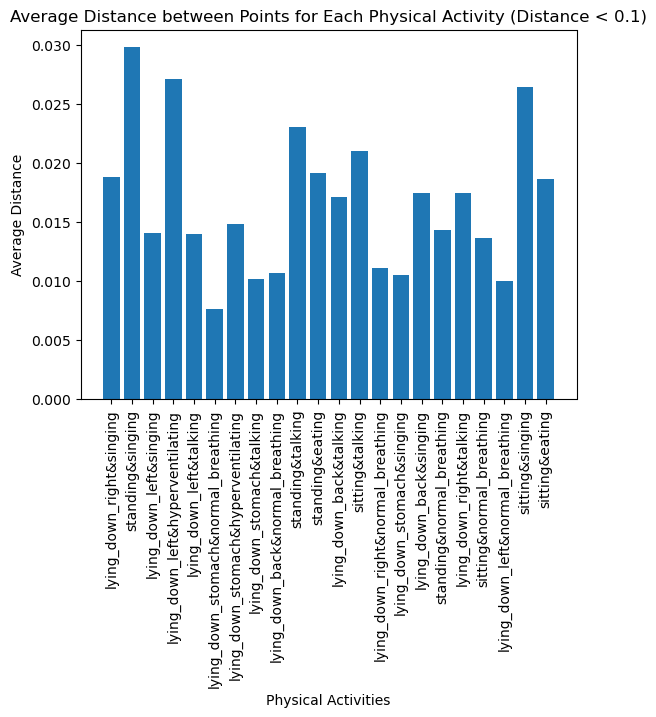

In [148]:
import matplotlib.pyplot as plt

# Filter the distance averages dictionary to only include values less than 0.1
filtered_distance_averages = {k: v for k, v in distance_averages.items() if v < 0.03}

plt.bar(filtered_distance_averages.keys(), filtered_distance_averages.values())

plt.xticks(rotation=90)
plt.xlabel('Physical Activities')
plt.ylabel('Average Distance')
plt.title('Average Distance between Points for Each Physical Activity (Distance < 0.1)')
plt.show()